# Objective

Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not. 

> You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

* k-Nearest Neighbour

* Decision Tree

* Support Vector Machine

* Logistic Regression

> The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

* Jaccard index

* F1-score

* LogLoass

In [120]:
#Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using plot style.
plt.style.use('seaborn')

In [121]:
#Loading data into dataframe.
df = pd.read_csv('loan_data_set.csv')

#Having a look at the data.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
#Having a look at the shape.
df.shape

(614, 13)

*  We have 614 rows and 13 columns inside the dataset. 

In [123]:
#Having a look at the datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [124]:
df['Loan_Status'] = df['Loan_Status'].replace('N',0).replace('Y',1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [125]:
#Removing load id column.
df.drop(['Loan_ID'],axis = 1,inplace = True)

In [126]:
#Having a look at the missing values.
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
#importing required library.
from sklearn.impute import SimpleImputer

In [128]:
#Let's replace missing values in numeric data with there median.
SI = SimpleImputer(missing_values= np.nan, strategy= 'median')
df[['LoanAmount','Loan_Amount_Term','Credit_History']] = SI.fit_transform(df[['LoanAmount','Loan_Amount_Term','Credit_History']])

In [129]:
#Having a look at missing values in numeric data.
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

* As we can see, numeric missing values are now replaced with there median.

In [130]:
#Having a look at the dataset.
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [131]:
#Replacing missing values with there mode.
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc(0))
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc(0))
df['Married'] = df['Married'].fillna(df['Married'].mode().iloc(0))
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc(0))

In [132]:
#Having a look at the missing values now.
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* As we can see, we don't have any kind of missing values.

In [133]:
#Having a look at the shape.
df.shape

(614, 12)

In [134]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


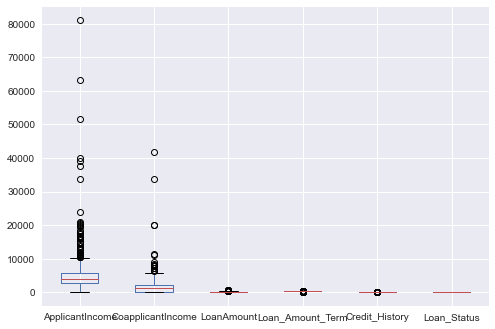

In [135]:
#Having a look at the outliers.
df.boxplot();

* As we can see, we have the outliers inside our dataset.

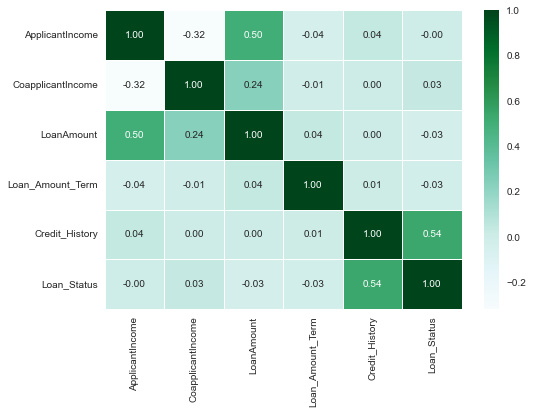

In [136]:
#Having a look at the correlation metrix.
sns.heatmap(df.corr(method= 'spearman'),
                    annot = True,
                    linewidths = '0.5',
                    fmt = '0.2f',
                    cmap = 'BuGn');

* In this metrix:
  1. Higher the positive value represent the higher the positive correlation.
  2. Higher the negative value represent the higher the negative correlation.
  3. The values near by zero represent no correlation.

In [137]:
#importing required libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,jaccard_score,log_loss

In [138]:
# Let's split dependent and independent variable.
x = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [139]:
y = df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [140]:
#let's split the data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = True)

In [141]:
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

491 123
491 123


In [142]:
#importing standardscaler.
from sklearn.preprocessing import StandardScaler

In [143]:
#initializing standard scaler.
SS = StandardScaler()
X_train = SS.fit_transform(x_train)
X_test = SS.fit_transform(x_test)

# KNeighborsClassifier

In [144]:
#Initializing KNN.
model1 = KNeighborsClassifier()
model1

KNeighborsClassifier()

In [145]:
#fit the data inside the model.
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [146]:
#Having a look at the KNN model score.
model1.score(X_test,y_test)

0.7642276422764228

* KNN giving us: 79% accuracy for given data.

In [147]:
#Having a look at prediction.
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [148]:
#Having a look at confusion matrix.
print(confusion_matrix(y_test,y_pred))

[[17 22]
 [ 7 77]]


In [149]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 1)

0.7264150943396226

In [150]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 0)

0.3695652173913043

* we get the jaccard score: 0.3695652173913043

In [151]:
#Having a look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.44      0.54        39
           1       0.78      0.92      0.84        84

    accuracy                           0.76       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.76      0.76      0.75       123



* F1 score for SVC: 0.78

In [152]:
#Having a look at log Loss.
print(log_loss(y_test,y_pred))

8.143431760942066


* we get the log loss: 8.143

# LogisticRegression

In [153]:
#Initializing LogisticRegression.
model2 = LogisticRegression()
model2

LogisticRegression()

In [154]:
#fit the data inside the model.
model2.fit(x_train,y_train)

LogisticRegression()

In [155]:
#Having a look at the KNN model score.
model2.score(x_test,y_test)

0.7967479674796748

* LogisticRegression giving us: 81% accuracy for given data.

In [156]:
#Having a look at prediction.
y_pred = model2.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [157]:
#Having a look at confusion matrix.
print(confusion_matrix(y_test,y_pred))

[[16 23]
 [ 2 82]]


In [158]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 1)

0.7663551401869159

In [159]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 0)

0.3902439024390244

In [160]:
#Having a look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



* F1 score for SVC: 0.80

In [161]:
#Having a look at log Loss.
print(log_loss(y_test,y_pred))

7.0202260212492815


* we get the log loss for LogisticRegression: 8.143

# DecisionTreeClassifier

In [162]:
#Initializing LogisticRegression.
model3 = DecisionTreeClassifier()
model3

DecisionTreeClassifier()

In [163]:
#fit the data inside the model.
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [164]:
#Having a look at the KNN model score.
model3.score(X_test,y_test)

0.7073170731707317

* DecisionTreeClassifier giving us: 63% accuracy for given data.

In [165]:
#Having a look at prediction.
y_pred = model3.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [166]:
#Having a look at confusion matrix.
print(confusion_matrix(y_test,y_pred))

[[20 19]
 [17 67]]


In [167]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 1)

0.6504854368932039

In [168]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 0)

0.35714285714285715

In [169]:
#Having a look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        39
           1       0.78      0.80      0.79        84

    accuracy                           0.71       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.70      0.71      0.71       123



* F1 score for SVC: 0.68

In [170]:
#Having a look at log Loss.
print(log_loss(y_test,y_pred))

10.109033679414292


* we get the log loss for Decision tree: 10.951436358985855


# SVC

In [171]:
#Initializing SVC.
model4 = SVC()
model4

SVC()

In [172]:
#fit the data inside the model.
model4.fit(X_train,y_train)

SVC()

In [173]:
#Having a look at the KNN model score.
model4.score(X_test,y_test)

0.7804878048780488

* KNN giving us: 79% accuracy for given data.

In [174]:
#Having a look at prediction.
y_pred = model4.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [175]:
#Having a look at confusion matrix.
print(confusion_matrix(y_test,y_pred))

[[16 23]
 [ 4 80]]


In [176]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 1)

0.7476635514018691

In [177]:
#Having a look at jaccard_score.
jaccard_score(y_test, y_pred,pos_label= 0)

0.37209302325581395

In [178]:
#Having a look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.41      0.54        39
           1       0.78      0.95      0.86        84

    accuracy                           0.78       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.78      0.76       123



* F1 score for SVC: 0.78

In [179]:
#Having a look at log Loss.
print(log_loss(y_test,y_pred))

7.581832141491732


* we get the log loss for SVC: 7.581832141491732